# Chapter 6 - Exercise 3
### Author: *John Benedick Estrada*
---
**Exercise:** One of the longest-lived small patterns is “rabbits”, which starts with 9 live cells and takes 17,331 steps to stabilize. You can get the initial configuration in various formats from http://thinkcomplex.com/rabbits.
Load this configuration and run it.


### Code from my solution to Chapter 6 - Exercise 2

In [1]:
from Cell2D import Cell2D
from scipy.signal import correlate2d
import numpy as np

##### Code obtained from the book and the provided notebooks

In [2]:
class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

##### Modifications done on the `make_life` function.

In [3]:
def parse_GoL(raw_str):
    IN_ALIVE_CELL = "O"
    IN_DEAD_CELL = "."
    OUT_ALIVE_CELL = "1"
    OUT_DEAD_CELL = "0"
    COMMENT = "!"

    board = []
    str_by_lines = raw_str.split("\n")
    
    for line in str_by_lines:
        board.append("")
        for char in line:
            # Ignore white spaces.
            if char.isspace():
                continue
            # Ignore the remaining characters in the line as they are commented out.
            elif char == COMMENT:
                if len(board[-1]) == 0:
                    board.pop()
                break
            elif char == IN_ALIVE_CELL:
                board[-1] += OUT_ALIVE_CELL
            elif char == IN_DEAD_CELL:
                board[-1] += OUT_DEAD_CELL
            else:
                raise ValueError(f"'{char}' is an invalid character.")
    return board


def make_life(n, m, row, col, str_input):
    life = Life(n, m)
    life.add_cells(row, col, *parse_GoL(str_input))
    return life

### The "Rabbits" pattern

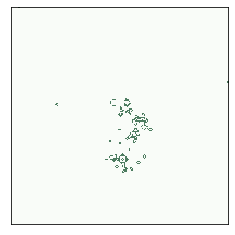

In [4]:
rabbits = """
!Name: Rabbits
!Author: Andrew Trevorrow
!A methuselah with lifespan 17331.
!http://www.conwaylife.com/wiki/index.php?title=Rabbits
O...OOO
OOO..O
.O
"""

rabbits_life = make_life(200, 200, 100, 100, rabbits)
rabbits_life.animate(17331)